# Project1: Nanjing Housing Price Prediction
Implement linear regression (Analytic, GD) for Nanjing housing price prediction



In [11]:
# Initialization
from project1func import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Part 1: Loading and Plotting

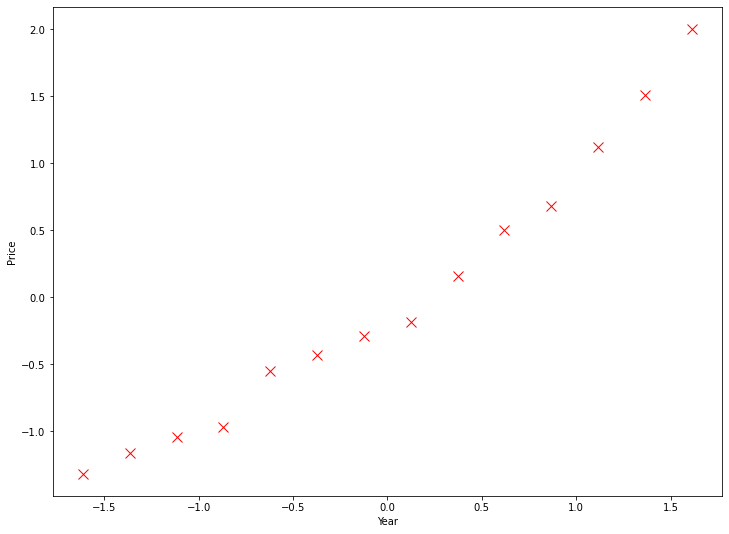

In [12]:
X = np.array([2000, 2001, 2002, 2003, 2004, 2005,
              2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])
y = np.array([2.000, 2.500, 2.900, 3.147, 4.515, 4.903,
      5.365, 5.704, 6.853, 7.971, 8.561, 10.000, 11.280, 12.900])

# feature normalize
X_norm,X_mu,X_sigma=featureNormalize(X)
y_norm,y_mu,y_sigma=featureNormalize(y)
m=len(y)
# plotting
plt.figure()
plotData(X_norm, y_norm)
plt.show()

### Part 2:Cost and Gradient descent


Running Gradient Descent ...

Theta found by gradient descent:

-1.899562116393229e-15
0.9805789067390293

Predict the Nanjing housing price in 2014.

For X=2014,we predict that price is 12.321033


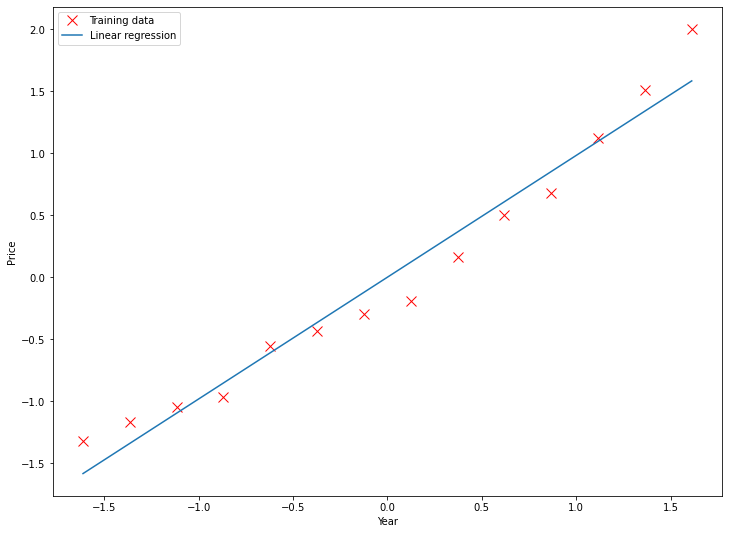

In [13]:
X_norm = np.hstack((np.ones((m,1)), X_norm[:,None]))
# random initialization theta
theta = np.random.uniform(-0.1, 0.1, (2,))
iterations = 3000
alpha = 0.01
lamb=1
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta,J_history = gradientDescent(X_norm, y_norm, theta, alpha, iterations,lamb)
# print theta to screen
print('Theta found by gradient descent:\n')
print(theta[0])
print(theta[1])
# Plot the linear fit
plt.figure()
plotData(X_norm[:,1],y_norm)
plt.plot(X_norm[:,1], np.dot(X_norm,theta), '-')
plt.legend(['Training data','Linear regression'])
plt.show()

# predict X=2014
Xt=2014
Xt_norm=Xt-X_mu
Xt_norm=Xt_norm/X_sigma
Xt_norm=np.array([[1,Xt_norm]])
yt_norm=Xt_norm.dot(theta)
yt=reFeature(yt_norm,y_mu,y_sigma)

print('\nPredict the Nanjing housing price in 2014.\n')
print('For X=2014,we predict that price is %f'%(yt,))

### Part 3: Normal equations
Using normal equations to solve theta
　

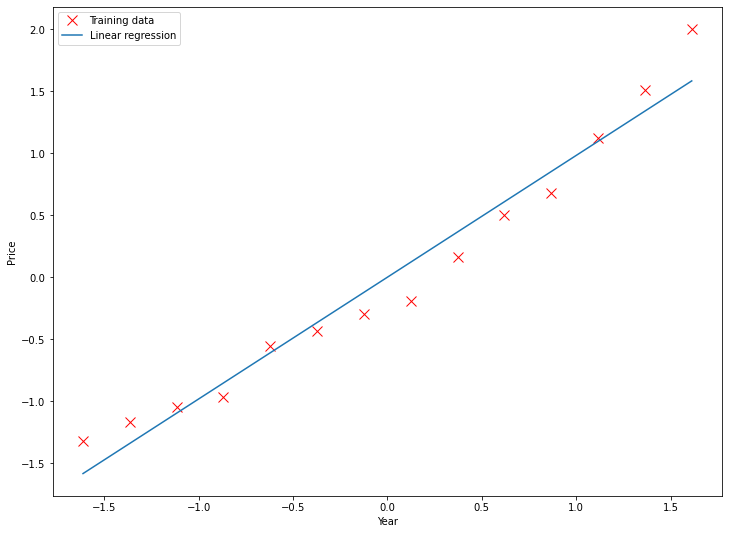

Theta found by close-form solution:

-3.0531133177191805e-16
0.9805789067391029

Predict the Nanjing housing price in 2014.

For X=2014,we predict that price is 12.321033


In [14]:
theta_e=normalEqn(X_norm,y_norm)
# Plot the linear fit
plt.figure()
plotData(X_norm[:,1],y_norm)
plt.plot(X_norm[:,1], np.dot(X_norm,theta_e), '-')
plt.legend(['Training data','Linear regression'])
plt.show()
# print theta to screen
print('Theta found by close-form solution:\n')
print(theta_e[0])
print(theta_e[1])
print('\nPredict the Nanjing housing price in 2014.\n')
# predict X=2014
Xt=2014
Xt_norm=Xt-X_mu
Xt_norm=Xt_norm/X_sigma
Xt_norm=np.array([[1,Xt_norm]])
yt_norm=Xt_norm.dot(theta_e)
yt=reFeature(yt_norm,y_mu,y_sigma)
print('For X=2014,we predict that price is %f'%(yt,))

### Part 4: Visualizing J(theta_0, theta_1)

Visualizing J(theta_0, theta_1) ...



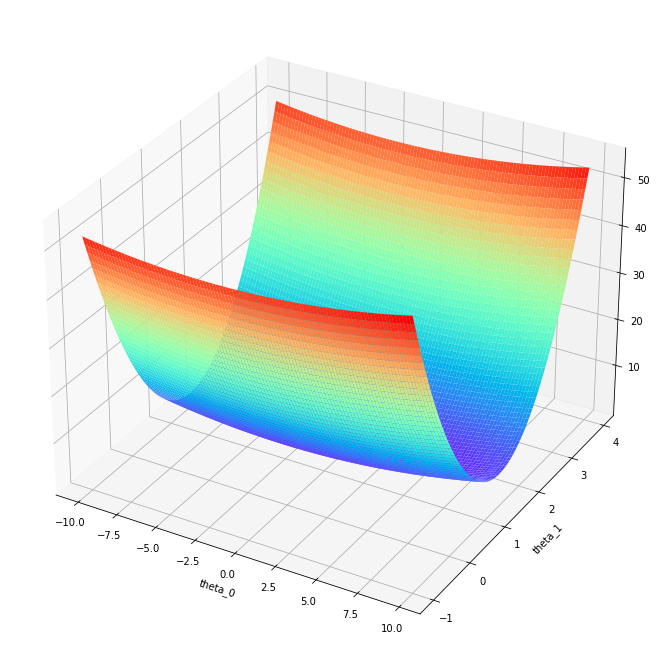

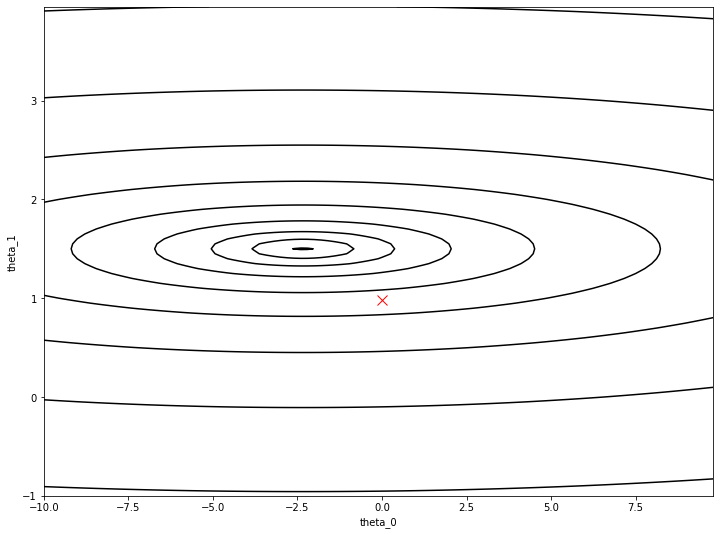

In [15]:
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.arange(-10,10,20/100)
theta1_vals = np.arange(-1, 4, 5/100)
# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
	    t = np.array([theta0_vals[i], theta1_vals[j]])
	    J_vals[i,j],_ = costFunction(X_norm, y_norm,t,lamb=1)
# Surface plot
fig=plt.figure()
ax = Axes3D(fig)
theta0_vals, theta1_vals=np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta0_vals, theta1_vals, J_vals,rstride = 1, cstride = 1,cmap='rainbow')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
# Contour plot
plt.figure()
plt.contour(theta0_vals, theta1_vals, J_vals,np.logspace(-2, 5, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx',markersize=10,linewidth=20)
plt.show()